In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# read file
file_path = "data/Structure_Fire_Stats_2000_June2024.csv"
df = pd.read_csv(file_path)

# check dataframe
df.head(5)

,Start_Year,Incident__,Begin_Time,Incident_Type,City,Property_Classification,Response_Type,Act_or_Omission__Cause_,Material_First_Ignited,Igniting_Object,Drive_Time,Start_Hr,First_Enroute,First_At_Scene,Under_Control,Time_UC,FID
0,2001,671,3/10/2001 11:55:58 AM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,00 Cannot be Determined,00 Cannot be determined,00 Object cannot be determined,387,11,3/10/2001 11:58:19 AM,3/10/2001 12:03:11 PM,NaN,NaN,1
1,2001,717,3/15/2001 6:16:38 PM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,91 Chimney fire - masonary,92 Creosote in chimney,"26 Chimney, masonry",281,18,3/15/2001 6:18:18 PM,3/15/2001 6:22:11 PM,3/15/2001 6:57:34 PM,00:35:23,2
2,2001,858,3/31/2001 3:56:35 PM,100 Structure Fire,McLeod Hill,"799 Misc. storage, unclassified",10 Fire (explosion)-dollar loss,00 Cannot be Determined,00 Cannot be determined,00 Object cannot be determined,440,15,3/31/2001 3:59:46 PM,3/31/2001 4:06:08 PM,3/31/2001 4:21:10 PM,00:15:02,3
3,2001,1145,4/26/2001 4:37:17 PM,100 Structure Fire,Charters Settlement,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,00 Cannot be Determined,00 Cannot be determined,00 Object cannot be determined,612,16,4/26/2001 4:39:35 PM,4/26/2001 4:49:42 PM,4/26/2001 6:29:22 PM,01:39:40,4
4,2001,1264,5/3/2001 11:01:41 AM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,20 Misuse...Cannot be determined,42 Wood Shavings,98 Chemical reaction/spon comb,75,11,5/3/2001 11:03:13 AM,5/3/2001 11:04:06 AM,5/3/2001 11:15:03 AM,00:10:57,5


In [31]:
df.tail(5)

,Start_Year,Incident__,Begin_Time,Incident_Type,City,Property_Classification,Response_Type,Act_or_Omission__Cause_,Material_First_Ignited,Igniting_Object,Drive_Time,Start_Hr,First_Enroute,First_At_Scene,Under_Control,Time_UC,FID
706,2018,4248,12/12/2018 8:37:31 PM,100 Structure Fire,Fredericton,229 Home for the aged,10 Fire (explosion)-dollar loss,780 Distracted / preoccupied,56 Oil cooking/lard/grease/butter,"020 Stove top, fire in pan",409,20,12/12/2018 8:39:57 PM,12/12/2018 8:45:47 PM,12/12/2018 9:17:40 PM,00:31:53,707
707,2018,4424,12/30/2018 8:18:18 PM,100 Structure Fire,Fredericton,689 Vehicles and related equip,10 Fire (explosion)-dollar loss,310 Fuel spilled accidentally,51 Gasoline,"620 Motor, electric, under 1 hp",169,20,12/30/2018 8:20:31 PM,12/30/2018 8:22:38 PM,12/30/2018 8:42:00 PM,00:19:22,708
708,2019,337,2/2/2019 8:39:50 PM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,770 Ignorance of Hazard,"04 Ext trim, inc. door,porch","780 Hot ashes, embers/not from cig",161,20,2/2/2019 8:41:02 PM,2/2/2019 8:43:17 PM,2/2/2019 9:02:01 PM,00:18:44,709
709,2019,357,2/4/2019 6:40:44 PM,100 Structure Fire,Fredericton,"324 Apt,twnhouse 3-20 w/o busines",10 Fire (explosion)-dollar loss,"360 Overheated cooking oil, grease",56 Oil cooking/lard/grease/butter,"020 Stove top, fire in pan",318,18,2/4/2019 6:42:46 PM,2/4/2019 6:47:38 PM,2/4/2019 8:05:27 PM,01:17:49,710
710,2019,559,2/23/2019 11:32:46 AM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,370 Combustibles too near the heat,25 Mattress/pillow,290 Other than listed,358,11,2/23/2019 11:34:23 AM,2/23/2019 11:40:01 AM,2/23/2019 12:26:08 PM,00:46:07,711


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Start_Year               711 non-null    int64 
 1   Incident__               711 non-null    int64 
 2   Begin_Time               711 non-null    object
 3   Incident_Type            711 non-null    object
 4   City                     711 non-null    object
 5   Property_Classification  711 non-null    object
 6   Response_Type            711 non-null    object
 7   Act_or_Omission__Cause_  685 non-null    object
 8   Material_First_Ignited   666 non-null    object
 9   Igniting_Object          669 non-null    object
 10  Drive_Time               711 non-null    int64 
 11  Start_Hr                 711 non-null    int64 
 12  First_Enroute            700 non-null    object
 13  First_At_Scene           697 non-null    object
 14  Under_Control            602 non-null    o

In [28]:
df.duplicated().sum()

np.int64(0)

array([2001, 2002, 2000, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2003, 2004, 2015, 2019, 2016, 2017, 2013, 2014, 2020, 2021, 2022,
       2023, 2024, 2018])

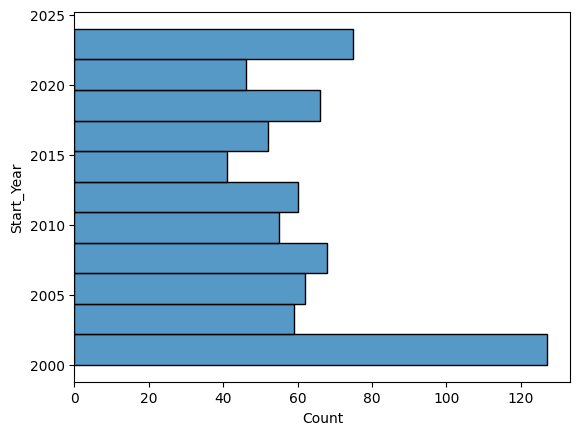

In [4]:
# Let us first look at the number of incidents by year
sns.histplot(data=df, y="Start_Year")

# print unique years
df["Start_Year"].unique()

<Axes: xlabel='Count', ylabel='Incident_Type'>

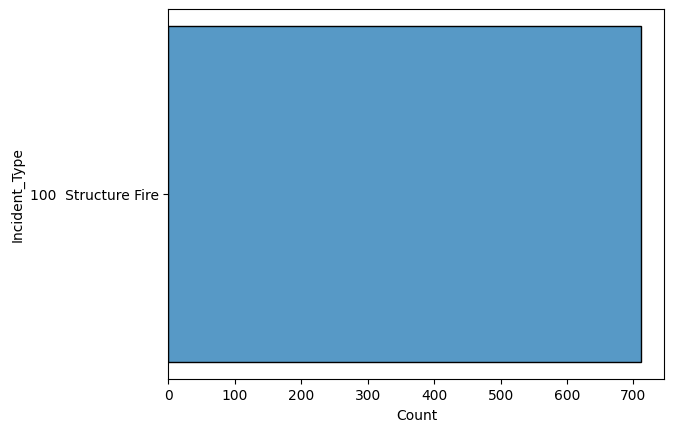

In [7]:
# now let's look at incident type
sns.histplot(data=df, y="Incident_Type")

There seems to be only one kind of incident. Let's check.

In [8]:
df["Incident_Type"].unique()

array(['100  Structure Fire'], dtype=object)

<Axes: xlabel='Count', ylabel='City'>

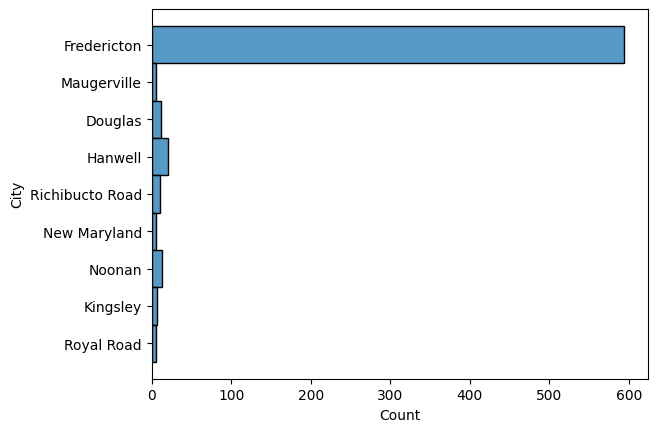

In [25]:
value_counts = df["City"].value_counts()
to_drop = value_counts[value_counts < 5].index
df_filtered = df[~df["City"].isin(to_drop)].copy()

sns.histplot(data=df_filtered, y="City")

In [5]:
df["Begin_Time"] = pd.to_datetime(df["Begin_Time"])
df["Under_Control"] = pd.to_datetime(df["Under_Control"])
df["First_At_Scene"] = pd.to_datetime(df["First_At_Scene"])

/var/folders/89/5rq5rcrx3nx_190mk61bc98h0000gn/T/ipykernel_736/439002973.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Under_Control"] = pd.to_datetime(df["Under_Control"])


<Axes: xlabel='Count', ylabel='Begin_Hour_Descriptive'>

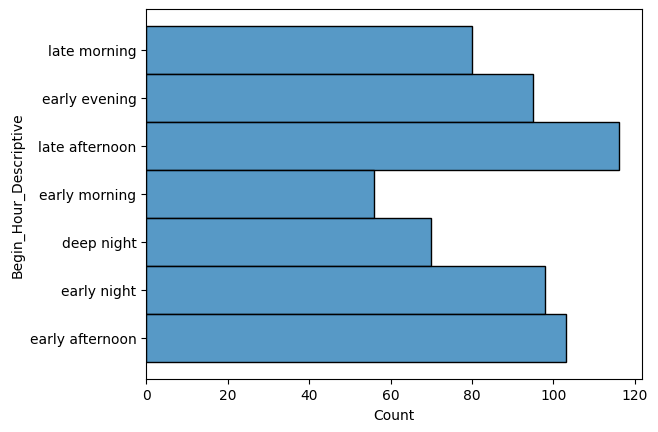

In [20]:
# What time do these fires often occur?

hour_bins = {0: "early night", 3: "deep night", 6: "early morning", 
             9: "late morning", 12: "early afternoon", 15: "late afternoon",
             18: "early evening", 21: "late evening"}

hour_bounds = list(hour_bins.keys())

def descriptive_hour(x):
    for (left_bound, right_bound) in zip(hour_bounds[:-1], hour_bounds[1:]):
        if left_bound <= x.hour < right_bound:
            return hour_bins[left_bound]

df["Begin_Hour_Descriptive"] = df["Begin_Time"].map(lambda x: descriptive_hour(x))

sns.histplot(data=df, y="Begin_Hour_Descriptive")

<Axes: xlabel='Count', ylabel='Season'>

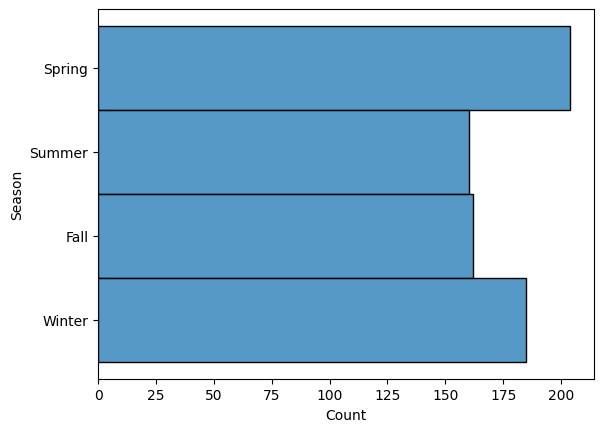

In [25]:
def get_season(month: int) -> str:
    """
    Returns the season based on the month number.

    Args:
        month: An integer representing the month (1 for January, 12 for December).

    Returns:
        A string representing the season (Winter, Spring, Summer, Fall).
    """
    if month in [12, 1, 2]:
        return "Winter"
    elif 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Fall"
    else:
        return "Invalid month"

df["Season"] = df["Begin_Time"].map(lambda x: get_season(x.month))

sns.histplot(data=df, y="Season")

In [38]:
cause = list(df["Act_or_Omission__Cause_"].dropna().unique())
cause = [(c.split()[0], " ".join(c.split()[1:])) for c in cause]
cause

[('00', 'Cannot be Determined'),
 ('91', 'Chimney fire - masonary'),
 ('20', 'Misuse...Cannot be determined'),
 ('11', 'Incendiary fire'),
 ('42', 'Automatic control failure'),
 ('21', 'Smokers material'),
 ('74', 'Accident'),
 ('13', 'Suspicious'),
 ('78', 'Distracted / preoccupied'),
 ('43', 'Manual control failure'),
 ('75', 'Impaired by drugs/alcohol/med'),
 ('53', 'Installed to close to combustib'),
 ('36', 'Overheated cooking oil, grease'),
 ('10', 'Cannot be determined'),
 ('72', 'Temporary loss of judgement'),
 ('44', 'Electric short circuit'),
 ('37', 'Combustibles too near the heat'),
 ('49', 'Mech/elec failure unclassified'),
 ('14', 'Suspicious - young offender'),
 ('92', 'Chimney fire - factory built'),
 ('70', 'Human Failing cannot be determi'),
 ('12', 'Incendiary fire, young offender'),
 ('40', 'Mech...cannot be determined'),
 ('31', 'Fuel spilled accidentally'),
 ('25', 'Welding/cutting too close to'),
 ('51', 'Deficiency, design'),
 ('99', 'Misc - unclassified'),
 ('2

In [39]:
igniting_object = list(df["Igniting_Object"].dropna().unique())
igniting_object = [(c.split()[0], " ".join(c.split()[1:])) for c in igniting_object]
igniting_object

[('00', 'Object cannot be determined'),
 ('26', 'Chimney, masonry'),
 ('98', 'Chemical reaction/spon comb'),
 ('16', 'Toaster, waffle iron'),
 ('71', "Smoker's mat/cigarettes/match"),
 ('99', 'Igniting Object,unclassified'),
 ('49', 'Appliance unclassified'),
 ('04', 'Stove top (other circumstnces'),
 ('65', 'Lighting fixture, incandescen'),
 ('02', 'Stove top, fire in pan'),
 ('77', 'Torch other than cut/welding'),
 ('29', 'Other than listed'),
 ('55', 'Electric receptacle/switch'),
 ('79', "Smoker mat'l/Open flame unclass"),
 ('21', 'Heating equipment, central'),
 ('54', 'Panel, electric/fuse/breaker'),
 ('28', 'Chimney, factory-built, metal'),
 ('05', 'Oven of stove, range'),
 ('27', 'Flue pipe, vent connector'),
 ('73', 'Lighter(not in conj. w/smoking)'),
 ('24', 'Space heater (Portable)'),
 ('33', 'Clothes dryer'),
 ('23', 'Space heater/wall furn/unit h'),
 ('76', 'Cutting torch/welding equipment'),
 ('56', 'Cable, electric, temporary'),
 ('51', 'Wiring, permanent'),
 ('75', 'Cand